Necessary libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Task 01:
> **Load the regression dataset. [Dataset = house_price_data.txt]. The dataset is given as a text file with no headers. You may add the headers and convert the text file to a csv file to load using pandas library.**



 I added the headers named : 'size','bedrooms' and 'price' in the text file and then saved it as a csv file.

In [93]:
df = pd.read_csv('house_price_data.txt', sep=',')

In [94]:
df.to_csv('house_price_data.csv', index=False)

Downloading the csv file in my pc.

In [95]:
from google.colab import files
files.download('house_price_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Seeing the first five elements to see if the data is correct or not.

In [96]:
print(df.head())

   size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


# Task 02:

> **Plot the each of the input features against the output feature. [Hint:Here, you can plot two graphs input_feature_1 vs output_feature and input_feature_2 vs output_feature. You may also plot both input features in the same graph may be showing input_feature_2 by color] [Hint:Use Scatterplot]**



I plotted a 8 inches by 6 inches graph individually for the two input features; using matplotlib and seaborn  

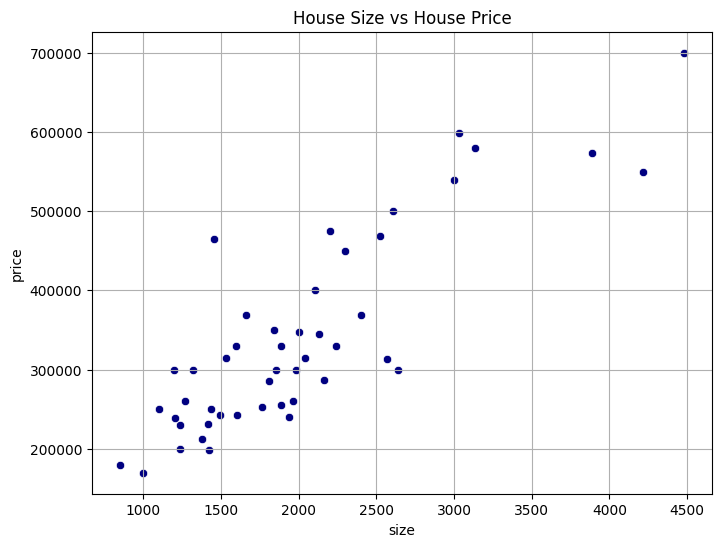

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='size', y='price', data=df, color='navy')
plt.title('House Size vs House Price')
plt.grid()
plt.show()

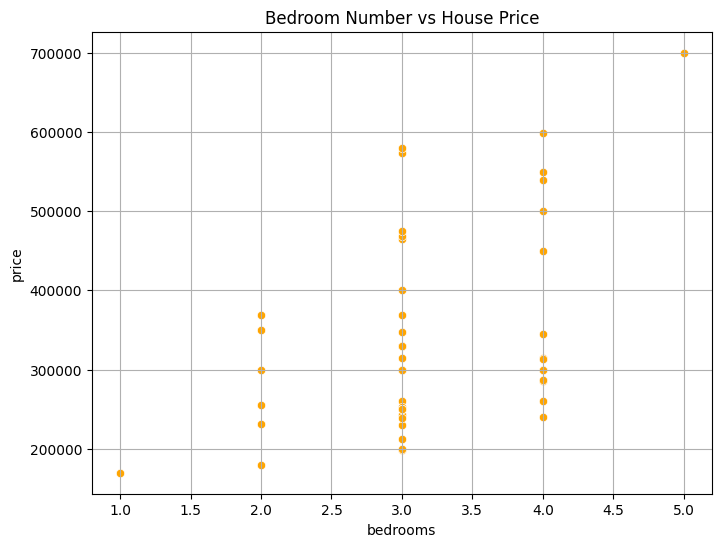

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=df, color='orange')
plt.title('Bedroom Number vs House Price')
plt.grid()
plt.show()

I also plotted two input features in the same graph just to see the changes.

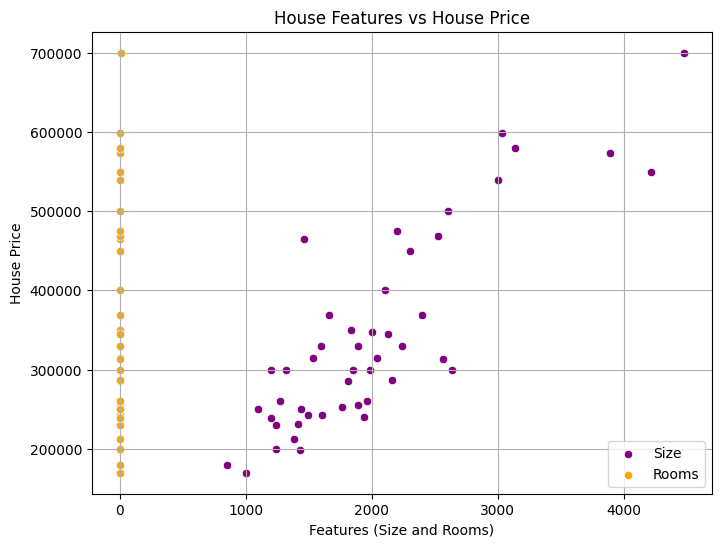

In [99]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x='size', y='price', data=df, label='Size', color='purple')

sns.scatterplot(x='bedrooms', y='price', data=df, label='Rooms', color='orange')

plt.title('House Features vs House Price')
plt.xlabel('Features (Size and Rooms)')
plt.ylabel('House Price')
plt.legend()
plt.grid()
plt.show()

# Task 03:

> **Display the statistical information for each of the input features (mean median, standard deviation and variance) using a built in function of the pandas library.**

This is self explanatory. I used the pandas library to get the information for each of the input features.

In [100]:
df[['size', 'bedrooms']].describe()

,size,bedrooms
count,47.000000,47.000000
mean,2000.680851,3.170213
std,794.702354,0.760982
min,852.000000,1.000000
25%,1432.000000,3.000000
50%,1888.000000,3.000000
75%,2269.000000,4.000000
max,4478.000000,5.000000


In [101]:
df[['size', 'bedrooms']].median()

,0
size,1888.0
bedrooms,3.0


In [102]:
df[['size', 'bedrooms']].mean()

,0
size,2000.680851
bedrooms,3.170213


In [103]:
df[['size', 'bedrooms']].std()

,0
size,794.702354
bedrooms,0.760982


In [104]:
df[['size', 'bedrooms']].var()

,0
size,631551.830712
bedrooms,0.579093


# Task 04:

> **Prepare the dataset by normalizing or scaling the feature set. You can use any kind of normalization here like: Min-Max normalization, Z-score normalization, Decimal Scaling**

I used the Z-score normalization here. Here, it rescales the data so that the mean becomes 0 and the standard deviation becomes 1, making the data have unit variance and a mean centered at zero. It makes it so that it's easier to compare the data. This way, both the house size and bedrooms number can be looked at on the same scale, even though they are originally measured in different units.

Then I just showed the first 5 rows.

In [105]:
df['size_normalized'] = (df['size'] - df['size'].mean()) / df['size'].std()
df['bedrooms_normalized'] = (df['bedrooms'] - df['bedrooms'].mean()) / df['bedrooms'].std()
print(df[['size_normalized', 'bedrooms_normalized']].head())

   size_normalized  bedrooms_normalized
0         0.130010            -0.223675
1        -0.504190            -0.223675
2         0.502476            -0.223675
3        -0.735723            -1.537767
4         1.257476             1.090417


# Task 05:

> **Prepare the training and testing dataset. Split them into a 80-20% ratio size. You may use the built in function train_test_split provided by the sklearn library. You may also do it manually selecting the first 80% and put it in a different array named X_train and put the last 20% data in another array named X_test. Then do the same for Y.**


 The main purpose of this is to train the model on the majority of the data (80%) and then evaluate its' performance on a smaller portion (20%) that the model has never seen before.

 Here 'X' is the independent variable and 'Y' is what I'm trying to predict. I used the train_test_split function from the sklearn.model_selection library. test_size = 0.2 means that I'm using 20% of the data for testing. Random_state = 0 means that if I run the same code again I'll get the same split. '_train' means the training set and 'test' means the testing set. Then I printed the first 5 rows to see the values.

In [106]:
X = df[['size', 'bedrooms']]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


print("X_train:")
print(X_train.head())
print("X_test:")
print(X_test.head())
print("Y_train:")
print(Y_train.head())
print("Y_test:")
print(Y_test.head())


X_train:
    size  bedrooms
27  2526         3
32  2040         4
29  2637         3
43  1200         3
2   2400         3
X_test:
    size  bedrooms
28  2200         3
33  3137         3
30  1839         2
4   3000         4
18  2609         4
Y_train:
27    469000
32    314900
29    299900
43    299000
2     369000
Name: price, dtype: int64
Y_test:
28    475000
33    579900
30    349900
4     539900
18    499998
Name: price, dtype: int64


# Task 06:
> **Implement the hypothesis function.**

**x:** represents the input feature matrix.

**theta:** is a vector of the model parameters (weights).

**np.dot(x, theta):** computes the dot product between the matrix x (input features) and the vector theta (model parameters). This is the mathematical operation that produces the predicted values in linear regression. The result is a vector of predicted values.

We know that, The equation for a hypothesis h(x) in linear regression is:

**h(x) = theta0 + theta1.x1 + theta2.x2 + ... + thetan.xn**





In [107]:
def h(x, theta):

  return np.dot(x,theta)

# Task 07:
> **Implement the cost function.**

This **cost_function** calculates the error for a given set of predictions in a linear regression model. It helps determine how well the model is predicting the target values based on the current theta.

**m = len(y)** calculates the number of training examples (m). y is the actual target values, and len(y) gives me the total number of data points.

**prediction** is used to calculate the predicted values based on the input features x and the current model theta.

**cost formula** is based on the Mean Squared Error (MSE). It calculates the average of the squared differences between the predicted values and the actual target values.**np.sum((predictions - y) ** 2)** calculates the total sum of the squared differences between the predicted and actual values.
The result is then multiplied by **1/(2*m)**, which scales the error.

In [108]:
def cost_function(x, y, theta):
    m = len(y)
    predictions = h(x, theta)

    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Task 08:

> **Implement the gradient descent function. You should return the updated theta values and the value from the cost function at found from each epoch.**

The function **gradient_descent** is an optimization algorithm that adjusts the model's theta to minimize the cost_function. It works iteratively, updating theta in each epoch to improve the model's performance.

**cost_history[]** is for storing the cost of each epoch

For each epoch:

I find **Predictions** in the same way as the previous function.

**gradient** is the partial derivative of the cost function with respect to theta. It says how to adjust theta to reduce the error.

**np.dot(x.T, (predictions - y))** computes the direction in which to adjust the parameters by multiplying the transpose of the input features with the difference between the predictions and actual values.

**1/m** scales the gradient by the number of training examples to compute the average gradient.

**theta = theta - learning_rate * gradient** updates the theta by moving in the direction opposite to the gradient. The learning rate controls the size of the step taken in each update. [A smaller learning rate means smaller steps, and a larger learning rate means bigger steps.]

**cost = cost_function(x, y, theta):** After updating theta, I calculated the cost for the current values of theta to see how well the model is performing.**cost_history.append(cost)**is storing the cost for this epoch so I can track progress over time.

Then I print the epoch, the cost and the theta.

In [109]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = len(y)
    cost_history = []

    for epoch in range(num_epochs):

        predictions = h(x, theta)

        gradient = (1 / m) * np.dot(x.T, (predictions - y))

        theta = theta - learning_rate * gradient

        cost = cost_function(x, y, theta)
        cost_history.append(cost)

        print(f'Epoch {epoch+1}/{num_epochs}, Cost: {cost}, Theta: {theta}')

    return theta, cost_history

# Task 09:

 > **Find the best fitted line with the gradient descent function**

 **X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)** normalizes the data to scale the data.

 **X_b = np.c_[np.ones(X.shape[0]), X]** represents the bias term (intercept) in linear regression. **np.c_** concatenates the bias column with the feature matrix, making **X_b** the augmented matrix that includes the intercept.

 **theta = np.random.randn(X_b.shape[1])** generates a vector of random numbers with the same length as the number of columns in **X_b (features + bias)**.

 **theta, J_all = gradient_descent(X_b, y, theta, learning_rate, num_epochs)** calls the **gradient_descent** function, which updates the parameters theta by minimizing the cost function.**J_all** stores the history of cost values for each epoch, while theta stores the optimized parameters after 50 epochs.

 **J = cost_function(X_b, y, theta)** calculates the final cost using the optimized theta by calling the **cost_function**. This gives an idea of how well the model fits the data after training.




In [110]:
X = df[['size', 'bedrooms']].values
y = df['price'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_b = np.c_[np.ones(X.shape[0]), X]

theta = np.random.randn(X_b.shape[1])

#hyperparameters
learning_rate = 0.1
num_epochs = 50

theta, J_all = gradient_descent(X_b, y, theta, learning_rate, num_epochs)

J = cost_function(X_b, y, theta)

print("Cost: ", J)
print("Parameters: ", theta)



Epoch 1/50, Cost: 53268306018.26836, Theta: [34041.23383406 10575.96473911  5470.99975581]
Epoch 2/50, Cost: 43389120916.039406, Theta: [64678.3764081  19788.42357066  9802.562615  ]
Epoch 3/50, Cost: 35457459773.90951, Theta: [92251.80472474 27837.08320459 13185.10170658]
Epoch 4/50, Cost: 29080578531.58096, Theta: [117067.89020971  34891.46577926  15778.68834561]
Epoch 5/50, Cost: 23947098591.269245, Theta: [139402.36714618  41095.17775051  17717.89403187]
Epoch 6/50, Cost: 19809589304.11648, Theta: [159503.39638901  46569.92936596  19115.7916246 ]
Epoch 7/50, Cost: 16471024597.459677, Theta: [177594.32270756  51418.92813918  20067.3313224 ]
Epoch 8/50, Cost: 13774215048.928051, Theta: [193876.15639425  55729.74393263  20652.18902173]
Epoch 9/50, Cost: 11593534252.09317, Theta: [208529.80671227  59576.72803365  20937.1694043 ]
Epoch 10/50, Cost: 9828421065.146294, Theta: [221718.09199849  63023.05575776  20978.2332554 ]
Epoch 11/50, Cost: 8398261571.174458, Theta: [233587.54875609  6

# Task 10:

> **Plot the best fitted line using matplotlib**

The resulting plot visually compares the actual house prices with the predicted prices from the linear regression model. The blue dots represent the actual data points (actual prices) for each house size, while the orange line shows the predicted prices from the model. This visualization helps to assess how well the model fits the data and indicates the trend captured by the linear regression.

**plt.scatter(df['size'], y, color='navy', label='Actual Prices')** creates a scatter plot where the x-axis represents the size of the houses (df['size']), and the y-axis represents the actual prices (y).
The actual prices are displayed in blue, and the legend is labeled "Actual Prices".

**predicted_prices_plot = theta[0] + theta[1] * (df['size'] - df['size'].mean()) / df['size'].std()** calculates the predicted prices for the original (non-normalized) size values.It uses the equation of the line based on the theta. Here, **theta[0]** is the bias, and **theta[1]** is the slope for the normalized size values.  I applied the normalization step **((df['size'] - df['size'].mean()) / df['size'].std())** to bring the size data into the same scale as used during the model training.



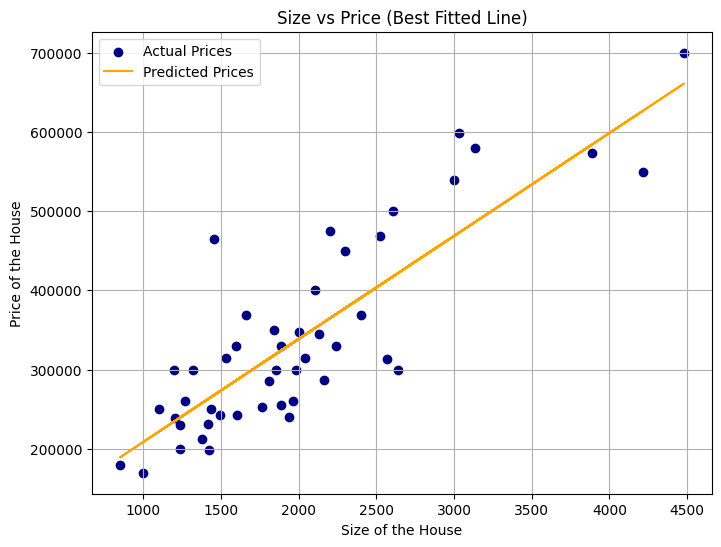

In [111]:
X = df[['size', 'bedrooms']].values
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_b = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

predicted_prices = h(X_b, theta)

plt.figure(figsize=(8, 6))
plt.scatter(df['size'], y, color='navy', label='Actual Prices')

predicted_prices_plot = theta[0] + theta[1] * (df['size'] - df['size'].mean()) / df['size'].std()

plt.plot(df['size'], predicted_prices_plot, color='orange', label='Predicted Prices')
plt.title('Size vs Price (Best Fitted Line)')
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.legend()
plt.grid()
plt.show()


# Task 11:

>**Plot graph of cost function vs. epoch.**

**plt.plot(range(1, num_epochs + 1), J_all, color='purple')** generates a sequence of integers representing the epoch numbers (from 1 to the total number of epochs).**J_all** contains the cost values recorded during each epoch of the gradient descent process.

The graph shows a downward trend, where the cost decreases as the number of epochs increases. This indicates that the model is learning and making better predictions.


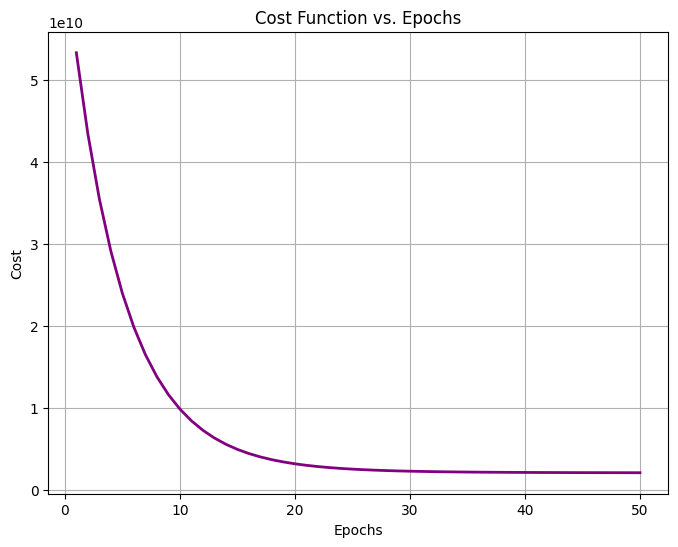

In [112]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), J_all, color='purple', linewidth = 2)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function vs. Epochs')
plt.grid()
plt.show()


# Task 12:

>**Implement the linear regression model with *sklearn* library.**

The explanations are given through comments.

Intercept (theta_0): 89597.90954279754
Coefficients (theta_1, theta_2): 139.2106740176255, -8738.019112327831
Mean Squared Error: 4086560101.2056575
R² Score: 0.7329450180289142


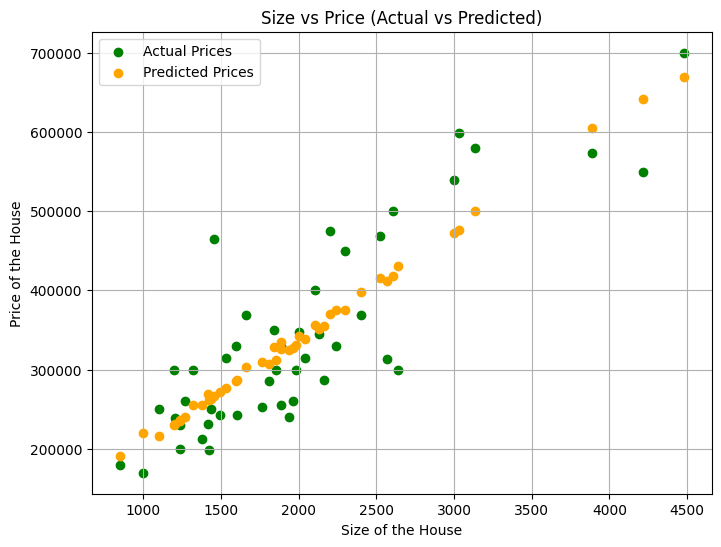

In [113]:
X = df[['size', 'bedrooms']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

theta_0 = model.intercept_  #(theta_0) is obtained from the model, which represents the predicted price when both features are zero.
theta_1, theta_2 = model.coef_ #(theta_1 and theta_2)are extracted, representing the impact of each feature on the predicted price. Specifically theta_1: The effect of the size of the house.theta_2: The effect of the number of bedrooms.

print(f"Intercept (theta_0): {theta_0}")
print(f"Coefficients (theta_1, theta_2): {theta_1}, {theta_2}")

#Predictions are made on the input features (X), and the predicted prices are stored in y_pred.
y_pred = model.predict(X)

#Measures the average squared difference between the actual and predicted prices. Lower values indicate better model performance.
mse = mean_squared_error(y, y_pred)

#indicates the proportion of variance in the target variable that is predictable from the features. It ranges from 0 to 1, with higher values indicating better fit.
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

#graph plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['size'], y, color='green', label='Actual Prices')
plt.scatter(df['size'], y_pred, color='orange', label='Predicted Prices')
plt.title('Size vs Price (Actual vs Predicted)')
plt.xlabel('Size of the House')
plt.ylabel('Price of the House')
plt.legend()
plt.grid()
plt.show()
